***
## Présentation du Projet
***
Academy, start-up de la EdTech : propose des contenus de formation en ligne pour un public de niveau Lycée et Université
 - Projet : Expansion à l'internationl de l'entreprise. 

## Mission

**Analyse exploratoire :** 

    * Pour savoir si les données de la banque mondiale permettent d'informer le projet d'expansion.
    * Pays à fort potentiel de clients pour les services de la start-up ? 
    * Pour chaque Pays quelle sera l'évolution de ce potentiel de clients ? 
    * Dans quels pays l'entreprise doit-elle opérer en priorité ? 

## Source de données


Les données de la Banque Mondiale sont Disponibles à [l'adresse](https://datacatalog.worldbank.org/search/dataset/0038480)

**Graniluraté** : Nationale

**Temporalité** : 1970-20100

**Périodicité** : Annuelle


# Table des matières
[Importation des librairies](#importation)

1. [Importation des Data Sets dans jupyter notebook](#titre1)

2. [Description des fichiers de données](#titre2)

  2-1 [Le Data Frame Serires](#2.1)

   2-1-1 [Sélection des indicateurs candidats du fichier "series" et extraction des colonnes pertinentes pour notre analyse](#2.1.1)

   2.1.2. [Les méthodes d'agrégation](#2.1.2)
  
   2.1.3. [Liste des indicateurs candidats](#2.1.3)
  
   2.1.4. [Pré-sélection des indicateurs](#2.1.4)
  
 2.2. [Le Data Frame footNote :](#2.2)
 
 2.3. [Le Data Frame CountrySeries](#t2.3)
 
 2.4. [Le Data Frame Country](#2.4)
 
 2.5. [Le Data Frame data](#2.4)
 
   2.5.1. [Merge des fichiers dataTest et seriesFinal](#2.5.1)
  
   2.5.2. [Sélection des pays riches](#2.5.2)
   
3. [Taux de remplissage des Indicateurs](#titre3)

 3.1. [Taux de remplissage, représentation graphique - Années -](#3.1)
 
 3.2. [Taux de remplissage, représentation graphique - Indicateurs -](#3.2)
 
 3.3. [3-3 Taux de remplissage, représentation graphique - Pays - ](#3.3)
 
 3.4. [Tri du Data Frame : dataBrut](#3.4)
 
   3.4.1. [Suppression des années mal remplies](#3.4.1)
  
   3.4.2. [Choix des indicateurs finaux](#3.4.2)
  
   3.4.3. [Choix des Pays](#3.4.3)
  
 3.5. [Filtrage du fichier dataBrut](#3.5)
 
   3.5.1. [Calcul des Moyennes pour chaque indicateurs pour l'ensemble des période](#3.5.1)
  
4. [Scoring](#titre4)

[Conclusion](#titre5)

### Importation des librairies :<a name="importation"></a>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

***
## 1 - Importation des Data Sets dans jupyter notebook:<a name="titre1"></a>

Après avoir télécharger les data sets nous alons à présent importer chaque fichier. 
***

In [2]:
#importation du fichier Data : EdStatsData
data = pd.read_csv('EdStatsData.csv')

In [3]:
#importation du fichier EdStatsCountry
country = pd.read_csv('EdStatsCountry.csv')


In [4]:
#importation du fichier EdStatsCountry-Series
countrySeries = pd.read_csv('EdStatsCountry-Series.csv')


In [5]:
#importation du fichier EdStatsFootNote
footNote = pd.read_csv('EdStatsFootNote.csv')


In [6]:
#importation du fichier EdStatsSeries
series = pd.read_csv('EdStatsSeries.csv')


***
## 2- Description des fichiers de données<a name="titre2"></a>

***

In [7]:
# Nombre de lignes et colonnes : 
data.shape

(886930, 70)

In [8]:
# Nombre de lignes et colonnes : 
country.shape

(241, 32)

In [9]:
# Nombre de lignes et colonnes : 
countrySeries.shape

(613, 4)

In [10]:
# Nombre de lignes et colonnes : 
footNote.shape

(643638, 5)

In [11]:
# Nombre de lignes et colonnes : 
series.shape

(3665, 21)

### 2-1 Le Data Frame Serires :<a name="2.1"></a>

In [12]:
series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Description des colonnes de type numérique : 
series.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#  Description des colonnes de type non numérique : 
series.describe(include ="object")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


***
Les fichiers de données **"series"** contiennent **3665 lignes et 70 colonnes.** 
La première colonne du tableau représente la liste des indicateurs comparables au niveau international. 
Les **3665 indicateurs** sont représentés sous une forme abrégée dans la colonne **"Series Code".** 
Les indicateurs sont **regroupés en 37 groupes** de différentes thématiques dans **la colonne "Topic"** ils décrivent l'accès à l'éducation, la progression, l'achèvement, l'alphabétisation, les enseignants, la population et les dépenses.
Nous remarquerons aussi la colonne **"Aggregation method"** qui a permis le calcul ou la présentation de **47 indicateurs** à l'aide d'une des **trois méthodes d'agrégation.** 
Le nom de chaque indicateur est défini dans les trois colonnes "Indicator Name", "Short definition" et " Long definition".

Nous utiliserons donc ce fichier pour notre analyse en gardant les colonnes intéressantes, dans la suite de notre analyse. 
***


In [15]:
#Nombre d'indicateurs total : 
series['Indicator Name'].unique().shape

(3665,)

In [16]:
# 37 Thématiques différentes : 
series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [17]:
# Nombre de total des thématiques. 
series['Topic'].unique().shape 

(37,)

Les différents indicateurs sont regroupés comme suite : 
- 'Niveau scolaire' 
- 'Egalité dans l'éducation'
- 'Infrastructure : Communications', 'Résultats d'apprentissage',
- 'Politique économique et dette : Comptes nationaux : Dollars US à prix courants : Indicateurs agrégés',
- 'Politique économique et dette : Comptes nationaux : dollars américains à prix constants de 2010 : Indicateurs agrégés',
- 'Politique Economique & Dette : Parité de Pouvoir d'Achat',
- 'Politique économique & Dette : Comptes nationaux : Atlas RNB & RNB par habitant',
- 'Enseignants', 'Systèmes d'information de gestion de l'éducation (SABRE)',
- 'Développement de la petite enfance (SABRE)',
- 'Engager le secteur privé (SABRE)',
- 'Santé scolaire et alimentation scolaire (SABRE)',
- 'Autonomie et responsabilité scolaires (SABRE)',
- 'Finances scolaires (SABRE)', 'Évaluation des étudiants (SABRE)',
- 'Enseignants (SABRE)', 'Enseignement supérieur (SABRE)',
- 'Développement de la main-d'œuvre (SABRE)', 'Alphabétisation', 'Contexte',
- « Primaire », « Secondaire », « Supérieur », « Éducation de la petite enfance »,
- 'Pré-Primaire', 'Dépenses', 'Santé : Facteurs de risque','Santé : Mortalité',
- « Protection sociale et travail : structure de la main-d'œuvre », « Laber »,
- 'Protection Sociale & Travail: Chômage',
- 'Santé : Population : Structure', 'Population',
- 'Santé : Population : Dynamique', 'EMIS',
- 'Post-Secondaire/Non Tertiaire'

In [18]:
# 0 valeur en double sur la colonne 'Nom de l'indicateur'
series.loc[series['Indicator Name'].duplicated(keep=False),:] 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


#### 2-1-1   Sélection des indicateurs candidats du fichier "series" et extraction des colonnes pertinentes pour notre analyse :<a name="2.1.1"></a> 

A présent pour commencer notre sélection des indicateurs potentiellement intéressants pour la suite de l'analyse, nous allons sélectionner des indicateurs qui comportent l'un des mots-clés suivants :

- 'total' : pour sélectionner les indicateurs totaux. 
- 'both sexes' : nous focaliserons notre étude sur les valeurs totales ou moyennes des indicateurs sans prendre en compte le genre. 
- 'tertiary' et 'secondary' : ces mots-clés semblent être intéressants en effet, ceci nous permettra d'extraire des indicateurs candidats directement liés à notre sujet de proposition de contenu de formation pour les élèves du lycée et université. 
- 'Personal computers ' : afin d'inclure les indicateurs du sous-groupe 'Infrastructure:Communications'


In [19]:
# Création de la colonne 'indiceTotalBoth' : 
# Initialisation de la nouvelle variable 'indiceTotalBoth' à 0 

series['indiceTotalBoth'] = 0  

# Cette Variable recevra les valeurs qui seront renvoyer par la méthode : .find() utilisée dans ce qui suit.


In [20]:
# Recherche des mots-clés ----> Utilisation de la méthode : .find('')

# indiceTotalBoth prendra : -1 si l'indicateur ne contient pas l'un des mots-clés. 
#                            N° de l'index de la chaîne de caractère qui contient l'un des mots-clés. 

for i in range(len(series['Indicator Name'])):
    series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('total')  #le mot 'total'      
    if series['indiceTotalBoth'][i] == -1 :
        series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('both sexes')
        if series['indiceTotalBoth'][i] == -1 : 
            series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('secondary')
            if series['indiceTotalBoth'][i] == -1 :
                series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('tertiary')
                if series['indiceTotalBoth'][i] == -1 :
                    series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('Personal computers ')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\1629146780.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('total')  #le mot 'total'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\1629146780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['indiceTotalBoth'][i] = series['Indicator Name'][i].find('both sexes')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23144\1629146780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

A partir des valeurs de la colonne 'indiceTotalBoth', l'idée est de récupérer les indices de chaque ligne, afin de sélectionner les indicateurs qui nous intéressent. 

In [21]:
# Sélection  des indicateurs comprenons les mots-clés  : 'total','both sexes','secondary','tertiary' et 'Communications'
# c'est-à-dire les lignes dont la valeurs de 'indiceTotalBoth' différente de '-1' 
newDataFrame = series[series['indiceTotalBoth'] != -1]

In [22]:
# le nouveau dataFrame contient à présent 1193 lignes c'est-à-dire 1194 Indicateurs. 
newDataFrame.shape 

(1194, 22)

In [23]:
# Nous vérifions l'existence de doublons
newDataFrame.loc[newDataFrame['Indicator Name'].duplicated(keep=False),:] 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,indiceTotalBoth


#### 2-1-2  Les méthodes d'agrégation :<a name="2.1.2"></a> 

***
- La méthode d'agrégation : Certains indicateurs sont calculés selon l'une des méthodes suivantes : Moyenne pondérée, Analyse des écarts, Somme.  

In [24]:
# Les méthodes d'agrégation :'Weighted average', 'Gap-filled total','Sum'

series['Aggregation method'].unique() 

array([nan, 'Weighted average', 'Gap-filled total', 'Sum'], dtype=object)

In [25]:
#Indicateurs selon : Weighted average
series.loc[series['Aggregation method'] == 'Weighted average', 'Indicator Name'] 

610                   Personal computers (per 100 people)
611                       Internet users (per 100 people)
1662                         GDP per capita (current US$)
1663                   GDP per capita (constant 2010 US$)
1664        GDP per capita, PPP (current international $)
1665    GDP per capita, PPP (constant 2011 internation...
1668           GNI per capita, Atlas method (current US$)
1669        GNI per capita, PPP (current international $)
2382    Prevalence of HIV, total (% of population ages...
2383      Mortality rate, under-5 (per 1,000 live births)
2384    Labor force with advanced education, female (%...
2385    Labor force with advanced education, male (% o...
2386    Labor force with advanced education (% of tota...
2387    Labor force with basic education, female (% of...
2388    Labor force with basic education, male (% of m...
2389    Labor force with basic education (% of total w...
2390    Labor force with intermediate education, femal...
2391    Labor 

In [26]:
#Indicateurs selon : Gap-filled total
series.loc[series['Aggregation method'] == 'Gap-filled total', 'Indicator Name']

1658                           GDP (current US$)
1659                     GDP (constant 2010 US$)
1660          GDP, PPP (current international $)
1661    GDP, PPP (constant 2011 international $)
1666                           GNI (current US$)
1667          GNI, PPP (current international $)
Name: Indicator Name, dtype: object

In [27]:
#Indicateurs selon : Sum
series.loc[series['Aggregation method'] == 'Sum', 'Indicator Name']

2394               Labor force, total
2401     Population ages 0-14, female
2402       Population ages 0-14, male
2403      Population ages 0-14, total
2507    Population ages 15-64, female
2508      Population ages 15-64, male
2509     Population ages 15-64, total
2590                Population, total
2591               Population, female
2593                 Population, male
Name: Indicator Name, dtype: object

          
***
- A partir de ce fichier et selon la méthode d'agrégation utilisée, 
    plusieurs indicateurs qui pourraient nous intéressés se dégagent notamment :
    * Personal computers (per 100 people). 
    * Internet users (per 100 people). 
    * GDP per capita (current US Dollars). 
    * GNI (current US Dollars)
    * Labor force. 
    * Unemployment. 
    * Labor force, total. 
    * Population, total. 
    * ...  
          
- Nous garderons pour notre Analyse les colonnes : "Series Code" , "Topic", "Indicator Name" , "Short definition" ,
   "Long definition";  
       
***
    

#### 2-1-3  Liste des indicateurs candidats :<a name="2.1.3"></a> 


Nous procédrons à la sélection des indicateurs candidats, pour ce faire, nous récupérons les indices des indicateurs : 

In [28]:
# Récupération des index des indicateurs selon la méthode d'agrégation : moyenne pondérée. 
index1 = series.loc[series['Aggregation method'] == 'Weighted average', 'Indicator Name'].index.tolist()

In [29]:
# Récupération des index des indicateurs selon la méthode d'agrégation : écarts totaux. 
index2 = series.loc[series['Aggregation method'] == 'Gap-filled total', 'Indicator Name'].index.tolist()

In [30]:
# Récupération des index de indicateurs selon la méthode d'agrégation : somme. 
index3 = series.loc[series['Aggregation method'] == 'Sum', 'Indicator Name'].index.tolist()

In [31]:
# Récupérons aussi les indices du data frame 'newDataFrame', qui comprte les indicateurs sélectionnés par une recherche
# mots-clés : 
index4 = newDataFrame.index.tolist() 

Après avoir récupéré les indices sous forme de listes, nous agrégeONS le tout dans une seule liste 'index' : 

In [32]:
# lISTE 'index'

index = [index1,index2,index3,index4]
indexList = []
for elem in index:
    indexList.extend(elem)

In [33]:
# nombre d'indicateurs à ce stade de l'analyse. 
len(indexList)

1241

In [34]:
# Duplicatats dans la liste indexList : 16 indicateurs sont dupliqués nous devons les supprimer 
duplic = [elm for elm in indexList if indexList.count(elm) > 1]
nbr_duplicates = list(set(duplic))
len(nbr_duplicates)

16

In [35]:
#Suppression des indices dupliqués
indexList = list(dict.fromkeys(indexList))

In [36]:
# Création d'un data frame 'seriesFinal', comportant les indicateurs candidats: 
seriesFinal = series[series.index.isin(indexList)]

In [37]:
# 1225 indicateurs candidats : 
seriesFinal = seriesFinal.reset_index()
seriesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                1225 non-null   int64  
 1   Series Code                          1225 non-null   object 
 2   Topic                                1225 non-null   object 
 3   Indicator Name                       1225 non-null   object 
 4   Short definition                     398 non-null    object 
 5   Long definition                      1225 non-null   object 
 6   Unit of measure                      0 non-null      float64
 7   Periodicity                          73 non-null     object 
 8   Base Period                          23 non-null     object 
 9   Other notes                          74 non-null     object 
 10  Aggregation method                   47 non-null     object 
 11  Limitations and exceptions    

In [38]:
# Avec notre critère de sélection : Recherche par mots-clés nous obtenons un total de 1225 indicateurs. 
    # index1 : Personal computers (per 100 people), Internet users (per 100 people) ... 
    # index2 : GDP (current US Dollars ),  GNI (current US Dollars) ... 
    # index3 : Population total , Population ages 15-64, total, ...
    # index4 : Indicateurs par mots-clés. 
    # indexList : Les indicaterus candidats. 

seriesFinal["Series Code"].unique().shape

(1225,)

In [39]:
# 0 Valeur en double sur notre jeu de données. 
seriesFinal.loc[seriesFinal['Series Code'].duplicated(keep=False),:]

,index,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,indiceTotalBoth


In [40]:
# Par la suite Nous utiliserons le data frame 'seriesFinal' afin de filtre les données. 
seriesFinal.shape

(1225, 23)

In [41]:
#### Suppression de quelques colonnes: 
# Sélectionner directement les colonnes utiles : 
# seriesFinal = seriesFinal.drop(['Unit of measure', 'Periodicity','Base Period', 'Other notes', 'Limitations and exceptions',
#                               'Notes from original source','General comments','Source','Statistical concept and methodology',
#                               'Development relevance','Related source links', 'Other web links', 'Related indicators',
#                               'License Type','Unnamed: 20','Aggregation method'], axis=1)

seriesFinal = seriesFinal.loc[:,"Series Code":"Indicator Name"]

seriesFinal.head()

,Series Code,Topic,Indicator Name
0,BAR.POP.1519,Attainment,"Barro-Lee: Population in thousands, age 15-19,..."
1,BAR.POP.15UP,Attainment,"Barro-Lee: Population in thousands, age 15+, t..."
2,BAR.POP.2024,Attainment,"Barro-Lee: Population in thousands, age 20-24,..."
3,BAR.POP.2529,Attainment,"Barro-Lee: Population in thousands, age 25-29,..."
4,BAR.POP.25UP,Attainment,"Barro-Lee: Population in thousands, age 25+, t..."


In [42]:
# Infos du nouveau data frame : 'seriesFinal'
seriesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     1225 non-null   object
 1   Topic           1225 non-null   object
 2   Indicator Name  1225 non-null   object
dtypes: object(3)
memory usage: 28.8+ KB


In [43]:
# Description du fichier seriesFinal
seriesFinal.describe(include='object')

,Series Code,Topic,Indicator Name
count,1225,1225,1225
unique,1225,26,1225
top,BAR.POP.1519,Attainment,"Barro-Lee: Population in thousands, age 15-19,..."
freq,1,286,1


In [44]:
# Les différentes thématiques selon les indicateurs candidats : 

seriesFinal['Topic'].unique()

array(['Attainment', 'Infrastructure: Communications',
       'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Literacy', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Teachers', 'Primary', 'Expenditures',
       'Health: Risk factors', 'Health: Mortality',
       'Social Protection & Labor: Labor force structure', 'Laber',
       'Social Protection & Labor: Unemployment',
       'Health: Population: Structure', 'Population',
       'Health: Population: Dynamics', 'EMIS',
       'Post-Secondary/Non-Tertiary', 'Education Equality'], dtype=object)

In [45]:
# Nombre d'indicateurs candidats par thématique : 
seriesFinal.groupby('Topic')[['Series Code']].count() # Mettre en bas

,Series Code
Topic,
Attainment,286
EMIS,1
Early Childhood Education,9
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,1
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,2
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,3
Economic Policy & Debt: Purchasing power parity,6
Education Equality,112
Expenditures,79


***
Parmi les **1225 indicateurs**, nous mettrons l'accent sur le choix des indicateurs qui appartiennent aux  
catégories (Topic) qui sont en relation avec notre sujet d'étude, c'est-à-dire : 
La population Totale; La population des étudiants du secondaire/universitaire ; Les indicateurs technologique :
(accès à internet, possesion d'un ordinateur) ; Les données économiques du pays ; 

Les thématqiues à enlever dans notre Data Frame : 

- Primary Pre-Primary
- Early Childhood Education
- Learning Outcomes
- Health: Population: Dynamics
- Health: Mortality Health: Risk factors

#### 2-1-4 Pré-sélection des indicateurs :<a name="2.1.4"></a>  

Après avoir sélectionné les indicateurs candidats en relation avec notre besoin métier, nous procédrons à la pré-sélection d'indicateurs, ainsi nous réduirons le nombre total d'indicateurs :

In [46]:
seriesFinal.loc[seriesFinal['Topic'] == 'Infrastructure: Communications', 'Series Code']

240    IT.CMP.PCMP.P2
241    IT.NET.USER.P2
Name: Series Code, dtype: object

In [47]:
seriesFinal.loc[seriesFinal['Topic'] == 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Series Code']

246    NY.GDP.MKTP.CD
250    NY.GDP.PCAP.CD
254    NY.GNP.MKTP.CD
Name: Series Code, dtype: object

In [48]:
seriesFinal.loc[seriesFinal['Topic'] == 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Series Code']

247    NY.GDP.MKTP.KD
251    NY.GDP.PCAP.KD
Name: Series Code, dtype: object

In [49]:
seriesFinal.loc[seriesFinal['Topic'] == 'Economic Policy & Debt: Purchasing power parity', 'Series Code']

248    NY.GDP.MKTP.PP.CD
249    NY.GDP.MKTP.PP.KD
252    NY.GDP.PCAP.PP.CD
253    NY.GDP.PCAP.PP.KD
255    NY.GNP.MKTP.PP.CD
257    NY.GNP.PCAP.PP.CD
Name: Series Code, dtype: object

In [50]:
seriesFinal.loc[seriesFinal['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Series Code']

256    NY.GNP.PCAP.CD
Name: Series Code, dtype: object

In [51]:
seriesFinal.loc[seriesFinal['Topic'] == 'Health: Risk factors', 'Series Code']

395    SH.DYN.AIDS.ZS
Name: Series Code, dtype: object

In [52]:
seriesFinal.loc[seriesFinal['Topic'] == 'Health: Mortality', 'Series Code']

396    SH.DYN.MORT
Name: Series Code, dtype: object

In [53]:
seriesFinal.loc[seriesFinal['Topic'] == 'Social Protection & Labor: Labor force structure', 'Series Code']

397    SL.TLF.ADVN.FE.ZS
398    SL.TLF.ADVN.MA.ZS
399       SL.TLF.ADVN.ZS
400    SL.TLF.BASC.FE.ZS
401    SL.TLF.BASC.MA.ZS
402       SL.TLF.BASC.ZS
403    SL.TLF.INTM.FE.ZS
404    SL.TLF.INTM.MA.ZS
405       SL.TLF.INTM.ZS
406    SL.TLF.TOTL.FE.ZS
407       SL.TLF.TOTL.IN
Name: Series Code, dtype: object

In [54]:
seriesFinal.loc[seriesFinal['Topic'] == 'Attainment', 'Series Code']

0                BAR.POP.1519
1                BAR.POP.15UP
2                BAR.POP.2024
3                BAR.POP.2529
4                BAR.POP.25UP
                ...          
675        UIS.EA.5.AG25T99.M
676        UIS.EA.5T8.AG25T99
677      UIS.EA.5T8.AG25T99.F
678    UIS.EA.5T8.AG25T99.GPI
679      UIS.EA.5T8.AG25T99.M
Name: Series Code, Length: 286, dtype: object

Dans ce qui suit, la pré_sélection des indicateurs :  

In [55]:
# 21 Indicateurs : Niveau d'étude et réalisation : 
attainment = ["BAR.NOED.1519.ZS",
"BAR.NOED.2024.ZS",
"BAR.NOED.2529.ZS",
"BAR.SEC.CMPT.1519.ZS",
"BAR.SEC.CMPT.2024.ZS",
"BAR.SEC.CMPT.2529.ZS",
"BAR.SEC.ICMP.1519.ZS",
"BAR.SEC.ICMP.2024.ZS",
"BAR.SEC.ICMP.2529.ZS",
"BAR.SEC.SCHL.1519",
"BAR.SEC.SCHL.2024",
"BAR.SEC.SCHL.2529",
"BAR.TER.CMPT.1519.ZS",
"BAR.TER.CMPT.2024.ZS",
"BAR.TER.CMPT.2529.ZS",
"BAR.TER.ICMP.1519.ZS",
"BAR.TER.ICMP.2024.ZS",
"BAR.TER.ICMP.2529.ZS",
"BAR.TER.SCHL.1519",
"BAR.TER.SCHL.2024",
"BAR.TER.SCHL.2529"]

In [56]:
# 4 indicateurs Education Equality
educationEqua = ["HH.DHS.NAR.23", "HH.DHS.SCR", "HH.MICS.NAR.23", "HH.MICS.SCR"]

In [57]:
# 2 indicateurs Infrastructure: Communications
infComunication = ["IT.CMP.PCMP.P2", "IT.NET.USER.P2"]

In [58]:
# Economic Policy & Debt
ecoPolDebt = ["NY.GDP.MKTP.CD", "NY.GDP.MKTP.KD", "NY.GDP.MKTP.PP.CD", "NY.GDP.MKTP.PP.KD", "NY.GDP.PCAP.CD", "NY.GDP.PCAP.KD",
"NY.GDP.PCAP.PP.CD", "NY.GDP.PCAP.PP.KD", "NY.GNP.MKTP.CD", "NY.GNP.MKTP.PP.CD", "NY.GNP.PCAP.CD", "NY.GNP.PCAP.PP.CD"]

In [59]:
# Indicateurs secondary
secondary =["SE.ADT.1524.LT.ZS", "SE.SEC.ENRL", "SE.SEC.ENRL.GC", "SE.SEC.ENRL.TC.ZS", "SE.SEC.ENRL.VO", "SE.SEC.ENRR",
"SE.SEC.NENR", "SE.SEC.PRIV.ZS", "SE.SEC.TCHR"]

In [60]:
# Indicateurs tertiary
teriary = ["SE.TER.ENRL", "SE.TER.ENRR", "SE.TER.GRAD", "SE.TER.GRAD.AG.ZS", "SE.TER.GRAD.ED.ZS", "SE.TER.GRAD.EN.ZS",
"SE.TER.GRAD.HL.ZS", "SE.TER.GRAD.HU.ZS", "SE.TER.GRAD.OT.ZS", "SE.TER.GRAD.SC.ZS", "SE.TER.GRAD.SS.ZS", "SE.TER.GRAD.SV.ZS",
"SE.TER.PRIV.ZS", "SE.TER.TCHR"]

In [61]:
# Indicateurs Expenditures
expend = ["SE.XPD.CUR.TOTL.ZS", "SE.XPD.SECO.PC.ZS", "SE.XPD.SECO.ZS", "SE.XPD.TERT.PC.ZS", "SE.XPD.TERT.ZS",
"SE.XPD.TOTL.GB.ZS", "SE.XPD.TOTL.GD.ZS"]

In [62]:
# Indicateurs Social Protection & Labor
socialProtLabour = ["SL.TLF.ADVN.ZS", "SL.TLF.TOTL.IN", "SL.UEM.NEET.ZS", "SL.UEM.TOTL.ZS"]

In [63]:
# Indicateurs sur la population 
population = ["SP.POP.1419.TO.UN", "SP.POP.1524.TO.UN", "SP.POP.TOTL", "SP.SEC.TOTL.IN", "SP.TER.TOTL.IN", "SP.POP.GROW"]

In [64]:
# Indicateurs tertiary enrlement programm
teriaryEnrlmtProgramm = ["UIS.E.4.PR", "UIS.FOSEP.56.F140", "UIS.FOSEP.56.F200", "UIS.FOSEP.56.F300", "UIS.FOSEP.56.F400",
"UIS.FOSEP.56.F500", "UIS.FOSEP.56.F600", "UIS.FOSEP.56.F700", "UIS.FOSEP.56.F800", "UIS.FOSEP.56.FUK"]

In [65]:
# Autres indicateurs
othersIndic = ["UIS.GER.4", "UIS.LP.Ag15t24", "UIS.PRP.4", "UIS.SAP.23.GPV.G1", "UIS.SAP.4", "UIS.TE_100000.56",
"UIS.XGDP.23.FSGOV", "UIS.XGDP.56.FSGOV", "UIS.XGDP.FSGOV.FDINSTADM.FFD", "UIS.XGOVEXP.IMF.23", "UIS.XGOVEXP.IMF.56",
"UIS.XSpendP.56.Fdpub.Fncap", "UIS.XSpendP.56.Fdpub.Fncur", "UIS.XUNIT.PPP.23.FSGOV", "UIS.XUNIT.PPP.56.FSGOV",
"UIS.XUNIT.PPPCONST.23.FSGOV", "UIS.XUNIT.PPPCONST.56.FSGOV", "UIS.XUNIT.US.23.FSGOV", "UIS.XUNIT.US.56.FSGOV",
"UIS.XUNIT.USCONST.56.FSGOV", "XGDP.23.FSGOV.FDINSTADM.FFD", "XGDP.56.FSGOV.FDINSTADM.FFD"]

In [66]:
# Création une liste d'indicateurs : 
listeIndicateurs = attainment + educationEqua +  infComunication + ecoPolDebt + secondary + teriary + expend +socialProtLabour + population + teriaryEnrlmtProgramm + othersIndic
listeIndicateurs = list(set(listeIndicateurs))
len(listeIndicateurs)  # 111 Indicateurs pré-sélectionnés.

111

In [67]:
# Duplicatats dans la liste listeIndicateurs : 
# listeIndicateurs.count('UIS.GER.4')
duplicates = [elm for elm in listeIndicateurs if listeIndicateurs.count(elm) > 1]
unique_duplicates = list(set(duplicates))
len(unique_duplicates)

0

In [68]:
# Sélection des indicateurs retenus dans le fichier seriesFinal :
seriesFinal = seriesFinal[seriesFinal["Series Code"].isin(listeIndicateurs)]

In [69]:
 
seriesFinal.head()

,Series Code,Topic,Indicator Name
61,BAR.SEC.CMPT.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
65,BAR.SEC.CMPT.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...
67,BAR.SEC.CMPT.2529.ZS,Attainment,Barro-Lee: Percentage of population age 25-29 ...
91,BAR.SEC.ICMP.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
95,BAR.SEC.ICMP.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...


In [70]:
seriesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 61 to 1224
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     101 non-null    object
 1   Topic           101 non-null    object
 2   Indicator Name  101 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [71]:
seriesFinal.shape

(101, 3)

In [72]:
# Test 
seriesFinal.loc[seriesFinal['Series Code'] == 'IT.CMP.PCMP.P2', 'Indicator Name'] 

240    Personal computers (per 100 people)
Name: Indicator Name, dtype: object

### 2-2  Le Data Frame footNote :<a name="2.2"></a> 

***

- Comporte **4 colonnes** 
    * Code Pays : **239** codes pays uniques.
***

In [73]:
#Les 2 premières lignes du data frame
footNote.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [74]:
footNote.CountryCode.unique().shape

(239,)

In [75]:
footNote.SeriesCode.unique().shape

(1558,)

### 2-3  Le Data Frame CountrySeries :<a name="2.3"></a> 

***

- Comporte **3 colonnes** : "CountryCode" , "SeriesCode", et "Description" et **613 Lignes**. 
    * Il n'existe pas de doublons dans le fichier CountrySeries.
***

In [76]:
#Les 3 premières lignes du data frame
countrySeries.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [77]:
countrySeries.duplicated(keep=False).shape[0]

613

### 2-4 Le Data Frame Country :<a name="2.4"></a> 

***
 
- Comporte **plusieurs colonnes** : "Region" , "Income Group", et "Country Code"...etc,  et **241 Lignes**. 
- Le data frame contient 32 colonnes et 241 lignes. 
    * Il n'existe pas de doublons dans le fichier Country.
- Les groupes de revenus : 'High income: nonOECD', 'Low income', 'Upper middle income', nan, 'Lower middle income', 
   'High income: OECD';
- Les régions : 'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', nan, 
   'Middle East & North Africa','East Asia & Pacific', 'North America';
- Le fichier 'Coutry.csv' contient plusieurs valeurs manquantes. 
***

In [78]:
#Les 3 premières lignes du data frame
country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [79]:
# Nombre de lignes et de colonnes
country.shape

(241, 32)

In [80]:
# Les différentes régions
country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [81]:
# Répartition du Nombre de Pays par région  :
country.groupby('Region')['Short Name'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Short Name, dtype: int64

In [82]:
# Les groupes de revenus
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [83]:
# Répartition du Nombre de Pays par groupe de revenu  :
country.groupby('Income Group')['Short Name'].count().sort_values(ascending=False)

Income Group
Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Short Name, dtype: int64

In [84]:
# Création d'un nouveau data frame qui comporte les colonnes : "Country Code","Region" et "Income Group"
codeRegionIncom = country[['Country Code', 'Region', 'Income Group']].copy()
codeRegionIncom = codeRegionIncom.reset_index()
codeRegionIncom.head(2)

,index,Country Code,Region,Income Group
0,0,ABW,Latin America & Caribbean,High income: nonOECD
1,1,AFG,South Asia,Low income


In [85]:
# Nous disposons de 241 (Pays/Regions)
codeRegionIncom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         241 non-null    int64 
 1   Country Code  241 non-null    object
 2   Region        214 non-null    object
 3   Income Group  214 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.7+ KB


### 2-5 Le Data Frame data :<a name="2.5"></a> 

In [86]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

- Contient **4 Colonnes** de type Object : "Country Name" , "Country Code", "Indicator Name	" et "Indicator Code". 
- une colonne "Unnamed:69" qui sera supprimer par la suite.
- **65 Colonnes Années** de type **float64** pour la période  **1970** à **2100**
- l'ensemble du data frame contient **886 930 lignes**
- La colonne "Indicator Name" : **contient 3665 indicateurs.** 
- Nous disposons d'une liste de **242 ( Pays + Régions).** 

***

In [87]:
data.shape # NOMBRE DE LIGNES ET DE COLONNES

(886930, 70)

In [88]:
data.columns # LES COLONNES

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [89]:
# Description des variables qualitatives : 
data.describe(include='object') 

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


3665 INDICATEURS ET 242 PAYS

In [90]:
# Description des colonnes années. 
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [91]:
# Liste des Pays et des Régions du monde : 
data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [92]:
# Suppression des colones "Indicator Name" et "Country Name" et "Unnamed: 69"
data = data.drop(['Country Name', 'Indicator Name', 'Unnamed: 69'], axis=1, errors="ignore")
data.head()

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARB,SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Merge avec le nouveau data frame codeRegionIncom : 
dataTest = pd.merge(data,codeRegionIncom,how='left',on='Country Code')
dataTest.head(2)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2070,2075,2080,2085,2090,2095,2100,index,Region,Income Group
0,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [94]:
dataTest.shape

(886930, 70)

In [95]:
data.shape

(886930, 67)

#### 2-5-1 Merge des fichiers dataTest et seriesFinal<a name="2.5.1"></a> 

In [96]:
# Renomer la colonne "Series Code" du ficheir indicatorSelected par "Indicator Code"

seriesFinal.rename(columns={'Series Code':'Indicator Code'}, inplace=True)

In [97]:
# Merge dataTest et seriesFinal

dataBrut = pd.merge(dataTest,seriesFinal,how='right',on='Indicator Code')

dataBrut.head(2)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2080,2085,2090,2095,2100,index,Region,Income Group,Topic,Indicator Name
0,ARB,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,Attainment,Barro-Lee: Percentage of population age 15-19 ...
1,EAS,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,Attainment,Barro-Lee: Percentage of population age 15-19 ...


In [98]:
#Le merge c'est bien passé

dataBrut.shape 

(23960, 72)

In [99]:
# A présent notre fichier dataBrut contient 101 indicateurs pour chauqe pays et/ou Region
dataBrut['Indicator Code'].unique().shape[0]

101

In [100]:
# Suppression des colonnes inutiles : 
# dataBrut.drop(['Indicator Name', 'Topic','Long definition','indiceTotalBoth','Short definition'], axis=1, inplace=True)

dataBrut = dataBrut.loc[:,"Country Code":"Income Group"]
dataBrut.drop(['index'], axis=1, inplace=True)
dataBrut.head()

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Income Group
0,ARB,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EAS,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EAP,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EMU,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ECS,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
dataBrut.describe(include='object')

,Country Code,Indicator Code,Region,Income Group
count,23958,23960,21186,21186
unique,242,101,7,5
top,ARB,BAR.SEC.CMPT.1519.ZS,Europe & Central Asia,Upper middle income
freq,99,242,5643,5445


In [102]:
# Taux de remplissage Moyen de notre dataBrut
tauxRempl = round(dataBrut.loc[:,'1970':'2100'].notna().mean().mean()*100, 2)
print('Le Taux de remplissage de l\'ensemble des données est de : ',tauxRempl, '%')

Le Taux de remplissage de l'ensemble des données est de :  20.52 %


In [103]:
# Regardons le taux de remplissage de notre data frame

df_nan_annee = (dataBrut.loc[:,"1970":"2100"].isna().sum()*100/dataBrut.shape[0]).to_frame(name='% NaN')

In [104]:
df_nan_annee

,% NaN
1970,78.351419
1971,85.175292
1972,85.471619
1973,85.479967
1974,85.638564
...,...
2080,100.000000
2085,100.000000
2090,100.000000
2095,100.000000


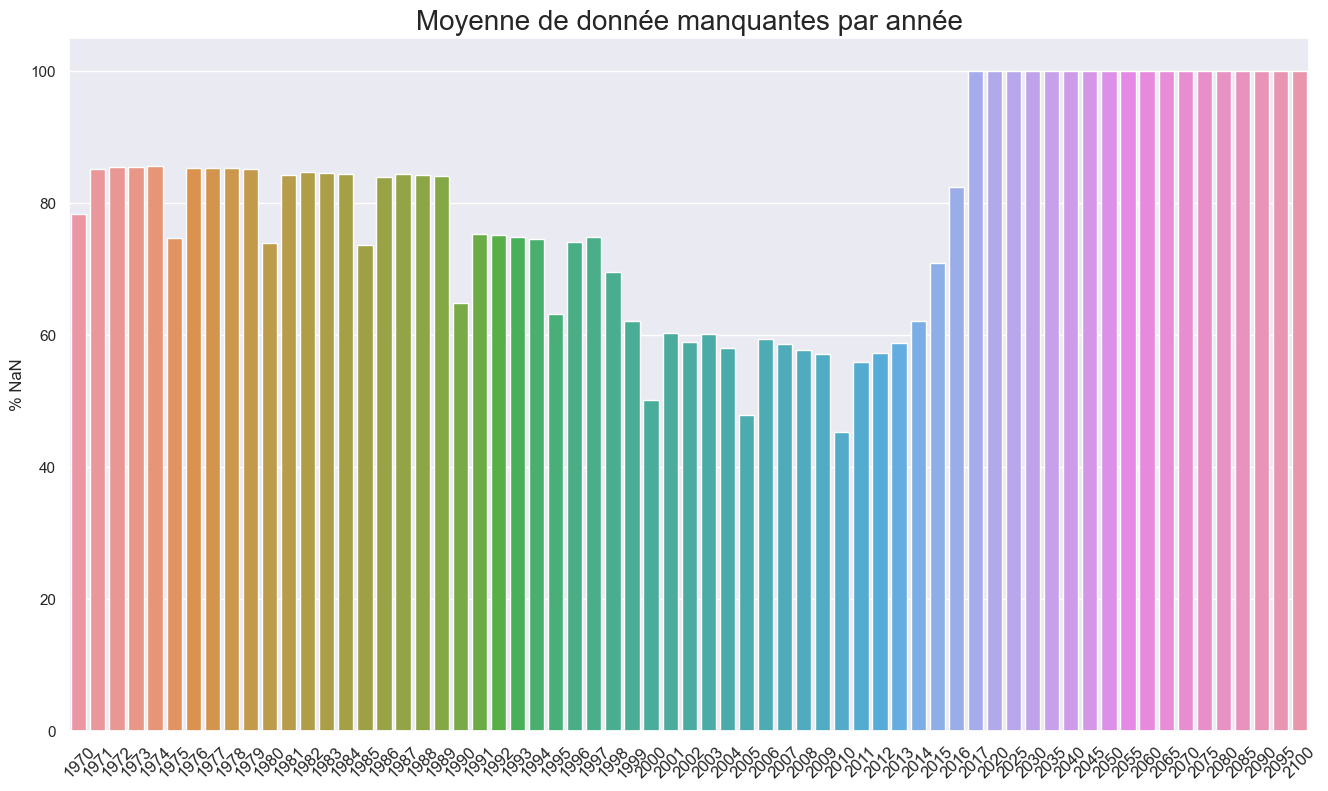

In [105]:
# Représentation graphique des moyennes des données manquantes de 1970 à 2100
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")
sns.set_palette('dark')
sns.set_theme()
#Titre : 
plt.title('Moyenne de donnée manquantes par année', size=20)

plot = sns.barplot(y = '% NaN', x=df_nan_annee.index, data = df_nan_annee)
plot.set_xticklabels(labels = df_nan_annee.index, rotation=45, size=12)
plt.show()

In [106]:
# Taux de valeurs manquantes  de notre dataBrut
tauxNan = round(dataBrut.loc[:,'1970':'2100'].isna().mean().mean()*100, 2)
print('Le Taux de valeurs manquantes de l\'ensemble des données est de : ',tauxNan, '%')

Le Taux de valeurs manquantes de l'ensemble des données est de :  79.48 %


In [107]:
# Taux de valeurs manquantes  de 2000 à 2010
tauxNan_20002010 = round(dataBrut.loc[:,'2000':'2010'].isna().mean().mean()*100, 2)
print('Le Taux de valeurs manquantes entre 2000 et 2010 : ',tauxNan_20002010, '%')

Le Taux de valeurs manquantes entre 2000 et 2010 :  55.73 %


In [108]:
# Taux de valeurs manquantes  de 1970 à 1990
tauxNan_19701990 = round(dataBrut.loc[:,'1970':'1990'].isna().mean().mean()*100, 2)
print('Le Taux de valeurs manquantes entre 1970 à 1990 : ',tauxNan_19701990, '%')

Le Taux de valeurs manquantes entre 1970 à 1990 :  82.02 %


In [109]:
# Taux de valeurs manquantes  de notre dataBrut
tauxNan_2010 = round(dataBrut.loc[:,'2010'].isna().mean().mean()*100, 2)
print('Le Taux de valeurs manquantes de l\'année 2010 : ',tauxNan_2010, '%')

Le Taux de valeurs manquantes de l'année 2010 :  45.31 %


In [110]:
# Nombre de valeurs en double : 
valeurDoubl = dataBrut.duplicated(subset=["Country Code","Indicator Code"]).sum()
print('Le Nombre de Valeurs en double est égal à :', valeurDoubl)

Le Nombre de Valeurs en double est égal à : 0


- L'année la plus fournie en terme de données est **2010** on retrouve le moins de données manquantes. 
- La période **2020-2100** comporte un taux élévé de valeurs manquantes. 
- La période **1970-2000** contient elle aussi un taux élévé de valeurs manquantes.

Après avoir mergé le dataset "data" et "indicatorSelected"  et "codeRegionIncom" : 

- Le Taux de valeurs manquantes de l'ensemble des données est de :  79.48 % 
- Le Taux de valeurs manquantes entre 2000 et 2010 :  55.73 %
- Le Taux de valeurs manquantes entre 1970 à 1990 :  82.02 %
- Le Taux de valeurs manquantes de l'année 2010 :  45.31 %
- Le Nombre de Valeurs en double du "dataBrut" est égal à : 0


#### 2-5-2 Sélection des pays riches<a name="2.5.2"></a> 
 

In [111]:
# Les différentes catégories des groupes de revenus : 

dataBrut["Income Group"].unique()

array([nan, 'Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [112]:
# Choix des Pays Hight Income : 
high_OCDE = dataBrut["Income Group"] == 'High income: OECD'
high_nonOCDE = dataBrut["Income Group"] == 'High income: nonOECD'

In [113]:
# data frame pays High Income : OCDE et Non OCDE
paysRiches = dataBrut[high_OCDE|high_nonOCDE]

In [114]:
#Sélection des Pays : 
dataBrut = dataBrut[dataBrut['Country Code'].isin(paysRiches['Country Code'])]

In [115]:
# Nous garderons 75 Pays pour l'analyse. 
len(dataBrut['Country Code'].unique())

75

In [116]:
# Nous garderons 99 indicateurs pour l'analyse. 
len(dataBrut['Indicator Code'].unique())

99

In [117]:
dataBrut.describe(include = 'object')

,Country Code,Indicator Code,Region,Income Group
count,7425,7425,7425,7425
unique,75,99,6,2
top,AND,BAR.SEC.CMPT.1519.ZS,Europe & Central Asia,High income: nonOECD
freq,99,75,3564,4356


## 3 - Taux de remplissage des Indicateurs<a name="titre3"></a> 

Dans les cellules suivantes, nous analyserons les remplissages des données par années, et par pays, cela nous permettra plus tard de décider d'une période donnée et de certains pays qui seraient intéressants à étudier : 

In [118]:
# Nombre de donnée non null pour chaque indicateur sur l'ensemble des années : 
df_annee =dataBrut.set_index('Indicator Code')
df_annee = df_annee.loc[:,'1970':'2100'].notnull().groupby('Indicator Code').sum()
df_annee.head()

# 49 pays nous renseigne sur l'indicateur 'BAR.SEC.CMPT.1519.ZS' pour l'année 1970

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.SEC.CMPT.1519.ZS,49,0,0,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.SEC.CMPT.2024.ZS,49,0,0,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.SEC.CMPT.2529.ZS,49,0,0,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.SEC.ICMP.1519.ZS,49,0,0,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAR.SEC.ICMP.2024.ZS,49,0,0,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Nombre de données non null pour chaque Pays sur l'ensemble des années : 
df_pays =dataBrut.set_index('Country Code')
df_pays = df_pays.loc[:,'1970':'2100'].notnull().groupby('Country Code').sum()
df_pays.head()

# le pays 'ABW' nous comporte 5 donnée sur l'année 1970

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,5,5,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
AND,9,13,13,13,13,13,13,9,9,9,...,0,0,0,0,0,0,0,0,0,0
ARE,23,11,11,11,11,34,13,13,17,19,...,0,0,0,0,0,0,0,0,0,0
ATG,5,6,11,9,11,11,11,16,16,11,...,0,0,0,0,0,0,0,0,0,0
AUS,36,17,17,17,18,36,18,18,19,19,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#pourcentage des valeurs non nulles pour chauqe indicateurs par année
df_annee = (df_annee/len(dataBrut['Country Code'].unique())) * 100 
df_annee.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.SEC.CMPT.1519.ZS,65.333333,0.0,0.0,0.0,0.0,65.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAR.SEC.CMPT.2024.ZS,65.333333,0.0,0.0,0.0,0.0,65.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAR.SEC.CMPT.2529.ZS,65.333333,0.0,0.0,0.0,0.0,65.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAR.SEC.ICMP.1519.ZS,65.333333,0.0,0.0,0.0,0.0,65.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAR.SEC.ICMP.2024.ZS,65.333333,0.0,0.0,0.0,0.0,65.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
#pourcentage des valeurs non nulles pour chauqe pays par année
df_pays = (df_pays/len(dataBrut['Indicator Code'].unique())) * 100 
df_pays.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,5.050505,5.050505,5.050505,5.050505,5.050505,5.050505,5.050505,5.050505,5.050505,5.050505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AND,9.090909,13.131313,13.131313,13.131313,13.131313,13.131313,13.131313,9.090909,9.090909,9.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARE,23.232323,11.111111,11.111111,11.111111,11.111111,34.343434,13.131313,13.131313,17.171717,19.191919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATG,5.050505,6.060606,11.111111,9.090909,11.111111,11.111111,11.111111,16.161616,16.161616,11.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUS,36.363636,17.171717,17.171717,17.171717,18.181818,36.363636,18.181818,18.181818,19.191919,19.191919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3-1 Taux de remplissage, représentation graphique - Années -<a name="3.1"></a> 

In [122]:
# Taux de remplissage des années de 1970 à 2016 : 
Remplissage_Annee = pd.DataFrame({'Année':df_annee.mean(axis=0).index, 'Mean_NotNull':df_annee.mean(axis=0).values})
Remplissage_Annee = Remplissage_Annee.set_index('Année')
Remplissage_Annee.head()

,Mean_NotNull
Année,
1970,20.606061
1971,13.979798
1972,13.468013
1973,13.791246
1974,13.750842


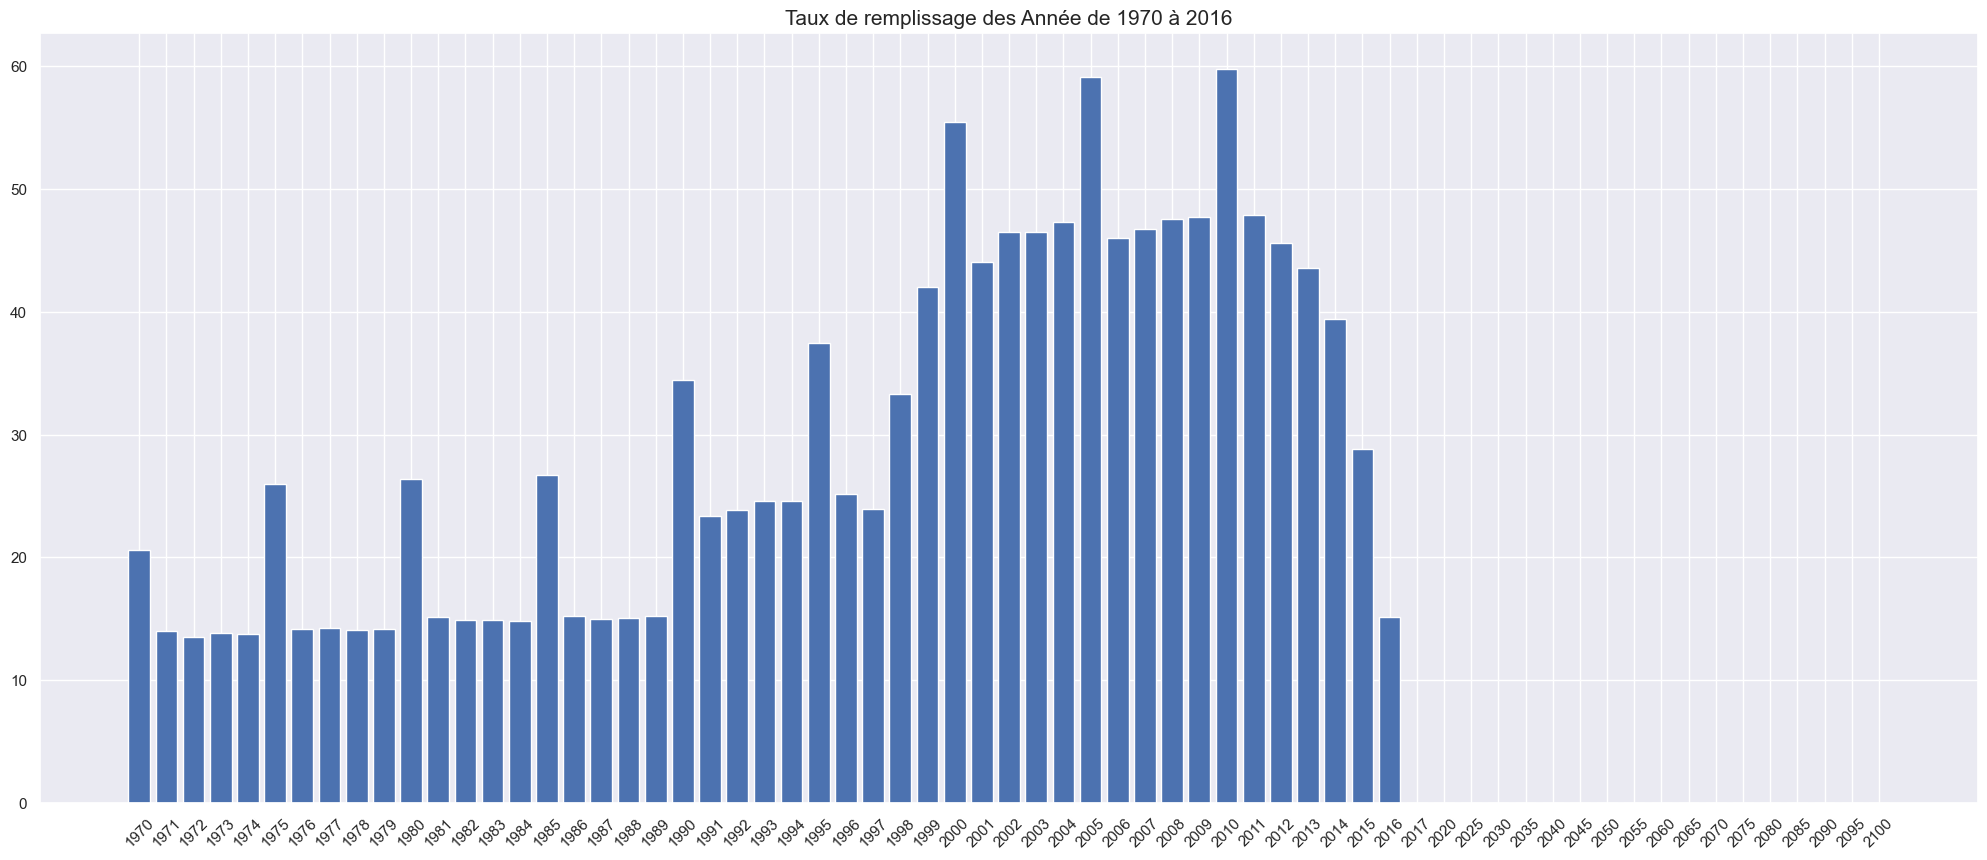

In [123]:
plt.figure(figsize=(25,10))
plt.bar(x= Remplissage_Annee.index, height = Remplissage_Annee['Mean_NotNull'].values)
plt.title('Taux de remplissage des Année de 1970 à 2016', size=15)
plt.xticks(rotation = 45)
plt.show()

### 3-2 Taux de remplissage, représentation graphique - Indicateurs -<a name="3.2"></a> 

In [124]:
# # Taux de remplissage par indicateur : 
indicators = list(df_annee.index)
mean_not_null = []
for c in indicators: 
    mean_not_null.append(df_annee.loc[c].mean())

In [125]:
#Taux de remplissage par indicateur : 
Remplissage_Indicateur = pd.DataFrame({'Indicateur':df_annee.index, 'Mean_NotNull':mean_not_null})
Remplissage_Indicateur = Remplissage_Indicateur.set_index('Indicateur')
Remplissage_Indicateur.head()

,Mean_NotNull
Indicateur,
BAR.SEC.CMPT.1519.ZS,9.046154
BAR.SEC.CMPT.2024.ZS,9.046154
BAR.SEC.CMPT.2529.ZS,9.046154
BAR.SEC.ICMP.1519.ZS,9.046154
BAR.SEC.ICMP.2024.ZS,9.046154


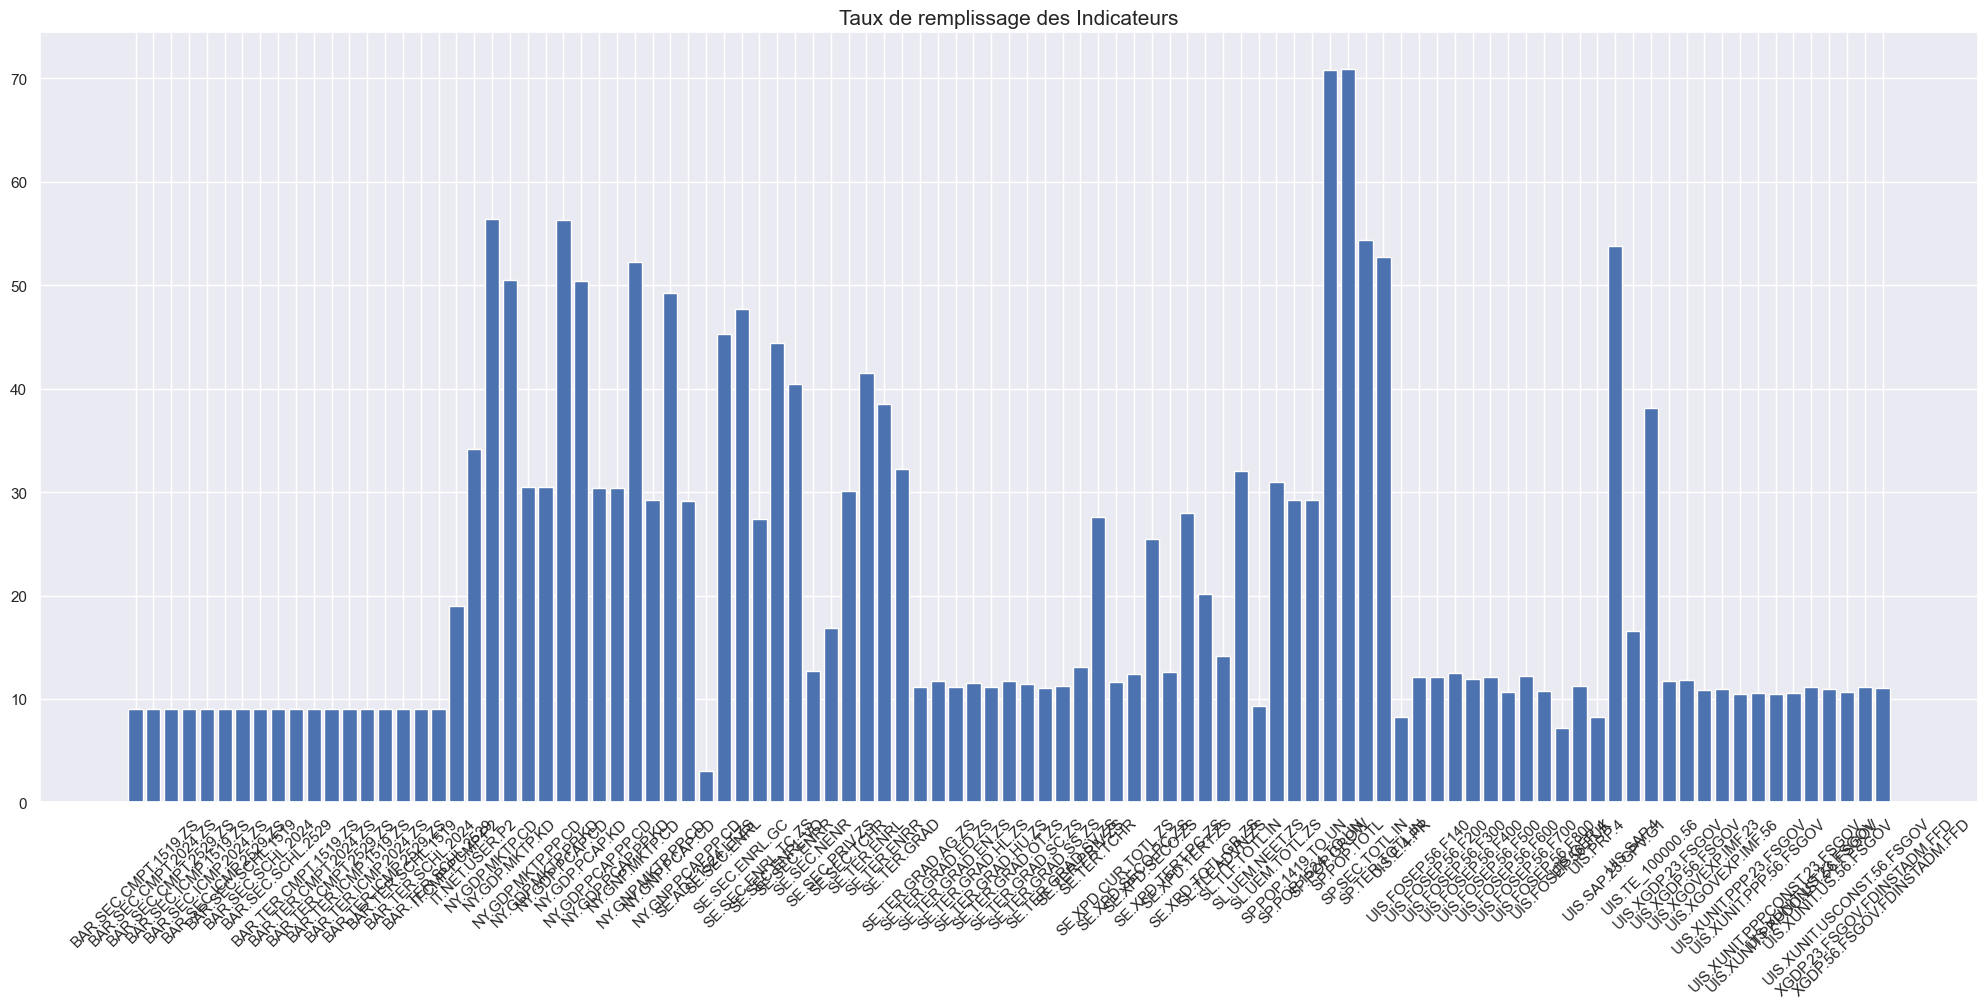

In [126]:
# Représentation graphique
plt.figure(figsize=(25,10))
plt.bar(x= Remplissage_Indicateur.index, height = Remplissage_Indicateur['Mean_NotNull'].values)
plt.title('Taux de remplissage des Indicateurs', size=15)
plt.xticks(rotation = 45)
plt.show()

### 3-3 Taux de remplissage, représentation graphique - Pays -<a name="3.3"></a> 

In [127]:
# # Taux de remplissage par Pays : 
pays = list(df_pays.index)
mean_not_null_pays = []
for c in pays: 
    mean_not_null_pays.append(df_pays.loc[c].mean())

In [128]:
#Taux de remplissage par Pays : 
Remplissage_Pays = pd.DataFrame({'Pays':df_pays.index, 'Mean_NotNull':mean_not_null_pays})
Remplissage_Pays = Remplissage_Pays.set_index('Pays')
Remplissage_Pays.head()

,Mean_NotNull
Pays,
ABW,12.416472
AND,11.857032
ARE,18.601399
ATG,14.560995
AUS,29.883450


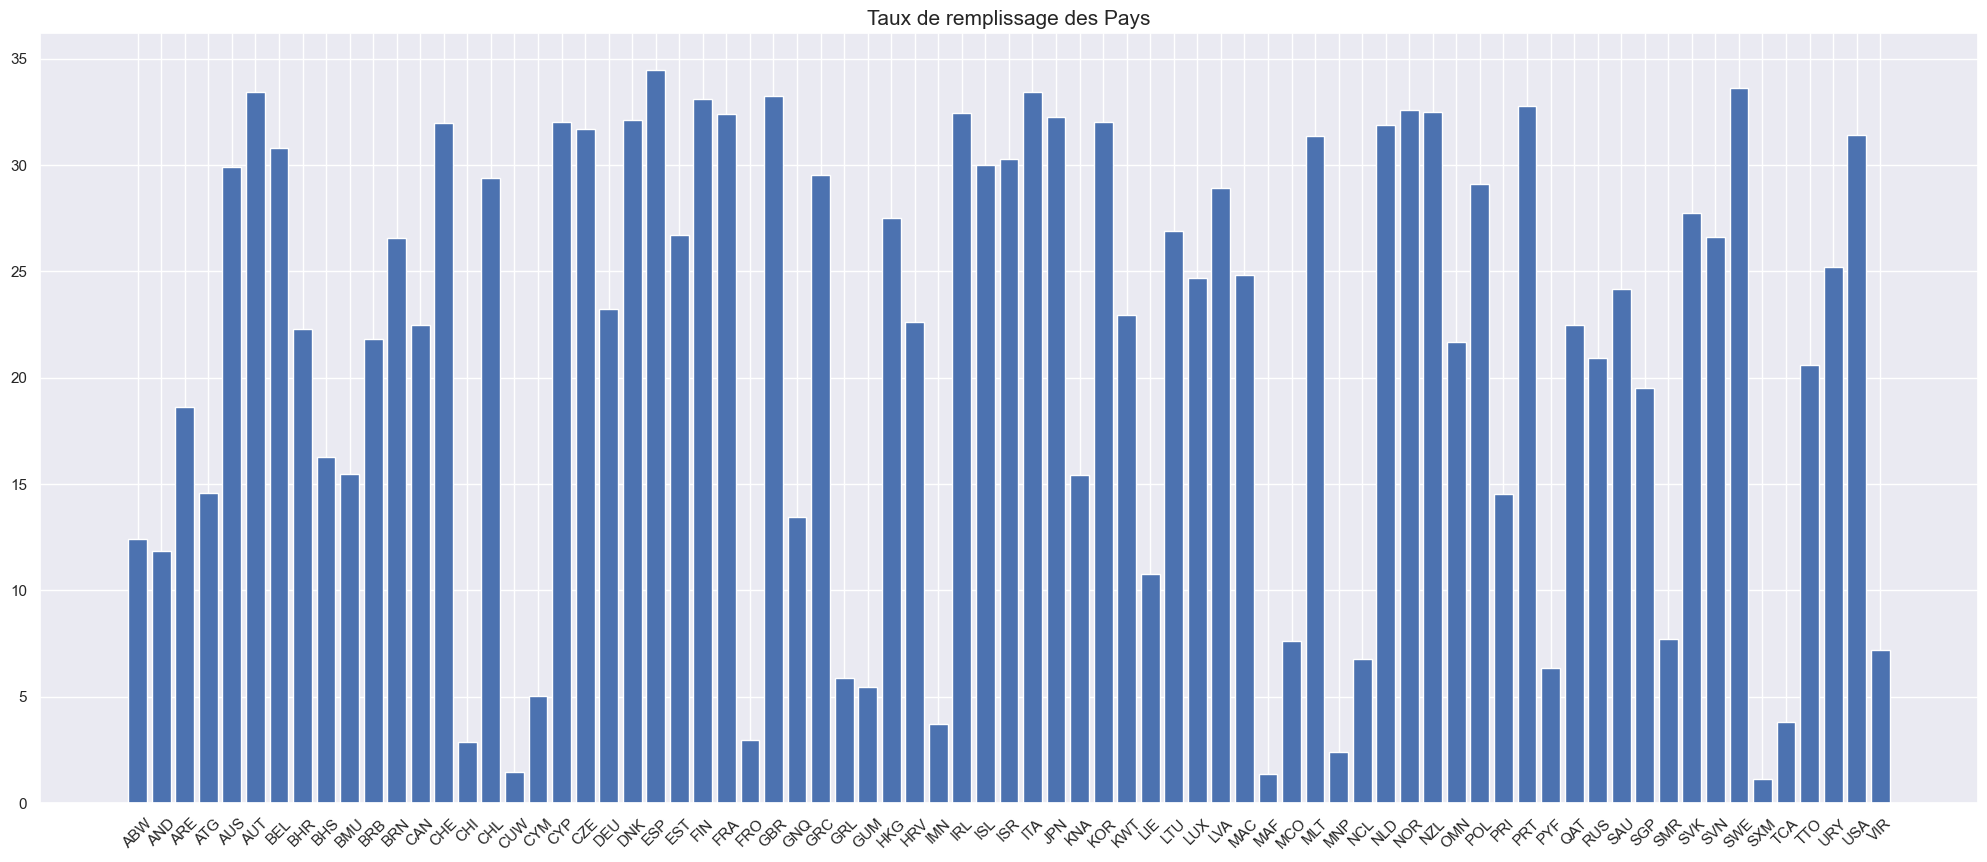

In [129]:
plt.figure(figsize=(25,10))
plt.bar(x= Remplissage_Pays.index, height = Remplissage_Pays['Mean_NotNull'].values)
plt.title('Taux de remplissage des Pays', size=15)
plt.xticks(rotation = 45)
plt.show()

### 3-4 Tri du Data Frame : dataBrut<a name="3.4"></a>

#### 3-4-1 Suppression des années mal remplies<a name="3.4.1"></a> 

In [130]:
# Suppression des années dont Mean_NotNull = 0
annee_supp = Remplissage_Annee.loc[Remplissage_Annee['Mean_NotNull'] ==  0].index

In [131]:
# Les années à supprimer : 
annee_supp

Index(['2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'],
      dtype='object', name='Année')

In [132]:
# Suppression des Années qui comporte en moyenne 0 valeur : 
dataBrut = dataBrut.drop(dataBrut.columns[dataBrut.columns.isin(annee_supp)],axis = 1)
dataBrut.head(2)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,Income Group
29,AND,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD
31,ATG,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income: nonOECD


#### 3-4-2 Choix des indicateurs finaux<a name="3.4.2"></a> 

In [133]:
# Nous choissierons actuellement les indicateurs intéressants pour notre étude : 
dataBrut['Indicator Code'].unique()

array(['BAR.SEC.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS',
       'BAR.SEC.CMPT.2529.ZS', 'BAR.SEC.ICMP.1519.ZS',
       'BAR.SEC.ICMP.2024.ZS', 'BAR.SEC.ICMP.2529.ZS',
       'BAR.SEC.SCHL.1519', 'BAR.SEC.SCHL.2024', 'BAR.SEC.SCHL.2529',
       'BAR.TER.CMPT.1519.ZS', 'BAR.TER.CMPT.2024.ZS',
       'BAR.TER.CMPT.2529.ZS', 'BAR.TER.ICMP.1519.ZS',
       'BAR.TER.ICMP.2024.ZS', 'BAR.TER.ICMP.2529.ZS',
       'BAR.TER.SCHL.1519', 'BAR.TER.SCHL.2024', 'BAR.TER.SCHL.2529',
       'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.KD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.KD',
       'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.MKTP.CD', 'NY.GNP.MKTP.PP.CD',
       'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD', 'SE.ADT.1524.LT.ZS',
       'SE.SEC.ENRL', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRL.TC.ZS',
       'SE.SEC.ENRL.VO', 'SE.SEC.ENRR', 'SE.SEC.NENR', 'SE.SEC.PRIV.ZS',
       'SE.SEC.TCHR', 'SE.TER.ENRL', 'SE.TER.ENRR', 'SE.TER.GRAD',
   

  
**Les indicateurs finaux avec l'approche métier :**
 
**Internet :** 
 - IT.NET.USER.P2 : Internet users (per 100 people)

**Économie du pays:**
 - NY.GDP.MKTP.CD : GDP (current US Dollar)
 - NY.GDP.PCAP.CD : GDP per capita (current US Dollar)
 - NY.GNP.MKTP.CD : GNI (current US Dollar)
 
**Scolarité :**

- SP.SEC.TOTL.IN : Population of the official age for secondary education, both sexes (number)
- SP.TER.TOTL.IN : Population of the official age for tertiary education, both sexes (number)

**Population :**
- SP.POP.GROW : Population growth (annual %)
- SP.POP.TOTL : Population, total
 
 

In [134]:
#Liste d'indicateurs intéressants pour notre étude : Approche métier
indicateurs_finaux = ['IT.NET.USER.P2','IT.CMP.PCMP.P2','NY.GDP.MKTP.CD',
                      'NY.GDP.PCAP.CD','NY.GNP.MKTP.CD','SP.SEC.TOTL.IN',
                      'SP.TER.TOTL.IN','SP.POP.GROW','SP.POP.TOTL']

In [135]:
# Sélection des indicateurs retenus : 
dataBrut = dataBrut[dataBrut['Indicator Code'].isin(indicateurs_finaux)]

In [136]:
# Indicateurs finaux : 
dataBrut['Indicator Code'].unique()

array(['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.CD',
       'NY.GDP.PCAP.CD', 'NY.GNP.MKTP.CD', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN'], dtype=object)

La cellule suivante n'a pas été exécutée durant notre analyse, elle montre une approche méthodologique, qui consiste à choisir les indicateurs selon un critère où la Mean_NotNull des indicateurs est supérieure à 30%. 

In [174]:
        # Suppression des indicateurs dont Mean_NotNull < 30% 
indicator_supp = Remplissage_Indicateur.loc[Remplissage_Indicateur['Mean_NotNull'] < 30].index 
        # Les indicateurs à supprimer : 
indicator_supp
        # Nous remarquons que l'indicateur " IT.CMP.PCMP.P2 "" fait parti des indicateur à supprimer, 
        # cet indicateur est pertinent, mais peut être qu'il corrélé positivement avec le internet users, donc il nous 
        # apporte la même information.

        # Liste des indicateurs retenus selon le critère de 30% de remplissage ou plus : 

dataBrut['Indicator Code'].unique()

        # Choix des 8 Indicaterus Pertinents : 

liste_indicateur_finale = ['IT.NET.USER.P2','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD','NY.GNP.MKTP.CD','SE.SEC.ENRL','SE.TER.ENRL',
 'SP.POP.GROW','SP.POP.TOTL','SP.SEC.TOTL.IN','SP.TER.TOTL.IN']

        # Nous utiliserons le fichier 'data_analyse' pour éffectuer les analyses sur les indicateurs : 

data_analyse = dataBrut[dataBrut["Indicator Code"].isin(liste_indicateur_finale)]

array(['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.CD',
       'NY.GDP.PCAP.CD', 'NY.GNP.MKTP.CD', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN'], dtype=object)

#### 3-4-3 Choix des Pays<a name="3.4.3"></a>

In [137]:
# Suppression des pays dont Mean_NotNull < 30% 
pays_supp = Remplissage_Pays.loc[Remplissage_Pays['Mean_NotNull'] < 30].index

In [138]:
# Les Pays à supprimer : 
pays_supp

Index(['ABW', 'AND', 'ARE', 'ATG', 'AUS', 'BHR', 'BHS', 'BMU', 'BRB', 'BRN',
       'CAN', 'CHI', 'CHL', 'CUW', 'CYM', 'DEU', 'EST', 'FRO', 'GNQ', 'GRC',
       'GRL', 'GUM', 'HKG', 'HRV', 'IMN', 'ISL', 'KNA', 'KWT', 'LIE', 'LTU',
       'LUX', 'LVA', 'MAC', 'MAF', 'MCO', 'MNP', 'NCL', 'OMN', 'POL', 'PRI',
       'PYF', 'QAT', 'RUS', 'SAU', 'SGP', 'SMR', 'SVK', 'SVN', 'SXM', 'TCA',
       'TTO', 'URY', 'VIR'],
      dtype='object', name='Pays')

In [139]:
# Sélection des Pays : 
df_pays = df_pays[~df_pays.index.isin(pays_supp)]

In [140]:
# Nous choissierons actuellement les pays qui comportent le moins de données manquantes: 
pays_finaux = list(df_pays.index)


In [141]:
# Sélection des pays choisis : 
dataBrut = dataBrut[dataBrut["Country Code"].isin(pays_finaux)]

In [142]:
dataBrut.head()

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,Income Group
4392,AUT,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD
4399,BEL,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD
4432,CYP,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD
4433,CZE,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD
4434,DNK,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD


### 3-5 Filtrage du fichier dataBrut<a name="3.5"></a> 

In [143]:
# Le fichier initial dataBrut, à présent comporte 198 lignes, et 51 colonnes
dataBrut.shape

(198, 51)

In [144]:
# Taux de remplissage Moyen de notre dataBrut
tauxRempl_brut = round(dataBrut.loc[:,'1970':'2016'].notna().mean().mean()*100, 2)
print('Le Taux de remplissage de l\'ensemble des données est de : ',tauxRempl_brut, '%')

Le Taux de remplissage de l'ensemble des données est de :  87.11 %


In [145]:
# Nous disposons de 22 Pays. 
len(dataBrut['Country Code'].unique())

22

Les pays intéressants en matière de valeurs à disposition : 
- AUT : Australie
- BEL : Belgium
- CYP : Cyprus
- Czech Republic
- DNK : Denmark
- FIN : Finland
- FRA : France
- IRL : Ireland
- ISR : Israel 
- ITA : Italy
- JPN : Japan 
- KOR : Korea
- MLT : Malta
- NLD : Netherlands
- NZL : New Zeland
- NOR : Norway
- PRT : Portugal 
- ESP : Spain 
- SWE : Sweden
- CHE : Switzerlan
- GBR : United Kigdom 
- USA : United States

In [146]:
# Création de 6 période d'analyse : 

In [147]:
# 1970 - 1989
dataBrut['1970-1989'] = dataBrut.iloc[:,2:22].mean(axis = 1)
# 1990-1995 
dataBrut['1990-1995'] = dataBrut.iloc[:,22:28].mean(axis = 1)
# 1996-2000 
dataBrut['1996-2000'] = dataBrut.iloc[:,28:33].mean(axis = 1)
# 2001-2005
dataBrut['2001-2005'] = dataBrut.iloc[:,33:38].mean(axis = 1)
#2006-2010
dataBrut['2006-2010'] = dataBrut.iloc[:,38:43].mean(axis = 1)
#2011-2016
dataBrut['2011-2016'] = dataBrut.iloc[:,43:49].mean(axis = 1)

In [148]:
dataBrut.head(3)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,Region,Income Group,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016
4392,AUT,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Europe & Central Asia,High income: OECD,4.592855,10.173581,25.459111,52.812582,NaN,NaN
4399,BEL,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Europe & Central Asia,High income: OECD,5.531541,13.006741,21.121051,30.904856,NaN,NaN
4432,CYP,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Europe & Central Asia,High income: nonOECD,NaN,2.220520,10.801138,22.169986,30.90677,NaN


In [149]:
# Affichage du data frame : data_analyse
data_analyse = dataBrut.copy()
data_analyse.head(2)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,Region,Income Group,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016
4392,AUT,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Europe & Central Asia,High income: OECD,4.592855,10.173581,25.459111,52.812582,NaN,NaN
4399,BEL,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Europe & Central Asia,High income: OECD,5.531541,13.006741,21.121051,30.904856,NaN,NaN


In [151]:
# Suppression des colonnes : 1970 à Income Group 
data_analyse = data_analyse.drop(data_analyse.iloc[:,2:-6], axis=1).set_index('Country Code')
data_analyse.head(3)

,Indicator Code,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016
Country Code,,,,,,,
AUT,IT.CMP.PCMP.P2,4.592855,10.173581,25.459111,52.812582,NaN,NaN
BEL,IT.CMP.PCMP.P2,5.531541,13.006741,21.121051,30.904856,NaN,NaN
CYP,IT.CMP.PCMP.P2,NaN,2.220520,10.801138,22.169986,30.90677,NaN


#### 3-5-1 Calcul des Moyennes pour chaque indicateurs pour l'ensemble des période<a name="3.5.1"></a>

In [157]:
# Internet users (per 100 people)
df_internet = data_analyse.loc[data_analyse['Indicator Code'] == 'IT.NET.USER.P2', '1990-1995':'2011-2016']
df_internet['Utilisation_Internet'] = df_internet.loc[:,'1990-1995':'2011-2016'].mean(axis=1)
df_1 = df_internet.iloc[:,[-1]]
df_internet.head(2) 

,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Utilisation_Internet
Country Code,,,,,,
AUT,0.846874,17.727761,46.145090,70.892,81.441348,43.410615
BEL,0.334704,11.799404,47.453679,67.032,83.511598,42.026277


In [158]:
# Personal computers (per 100 people)
person_comput = data_analyse.loc[data_analyse['Indicator Code'] == 'IT.CMP.PCMP.P2', '1970-1989':'2011-2016']
person_comput['Ordinateur_perso'] = person_comput.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_2 = person_comput.iloc[:,[-1]]
person_comput.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Ordinateur_perso
Country Code,,,,,,,
AUT,4.592855,10.173581,25.459111,52.812582,NaN,NaN,23.259532
BEL,5.531541,13.006741,21.121051,30.904856,NaN,NaN,17.641048


In [159]:
# GDP (current US$)
df_GDP_Current = data_analyse.loc[data_analyse['Indicator Code'] == 'NY.GDP.MKTP.CD', '1970-1989':'2011-2016']
df_GDP_Current['GDP_Current'] = df_GDP_Current.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_3 = df_GDP_Current.iloc[:,[-1]]
df_GDP_Current.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,GDP_Current
Country Code,,,,,,,
AUT,6.570309e+10,1.950482e+11,2.164574e+11,2.578580e+11,3.894099e+11,4.142276e+11,2.564507e+11
BEL,9.103966e+10,2.359657e+11,2.589762e+11,3.147912e+11,4.736722e+11,5.000083e+11,3.124089e+11


In [160]:
# GDP per capita (current US$)
df_GDP_Habitant = data_analyse.loc[data_analyse['Indicator Code'] == 'NY.GDP.PCAP.CD', '1970-1989':'2011-2016']
df_GDP_Habitant['GDP_Capita'] = df_GDP_Habitant.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_4 = df_GDP_Habitant.iloc[:,[-1]]
df_GDP_Habitant.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,GDP_Capita
Country Code,,,,,,,
AUT,8677.413236,24837.690590,27123.037187,31677.362461,46804.208398,48554.575513,31279.047898
BEL,9243.917293,23444.989543,25384.573554,30294.958275,44188.293015,44669.482306,29537.702331


In [162]:
# GNI (current US$)
df_GNI_Current = data_analyse.loc[data_analyse['Indicator Code'] == 'NY.GNP.MKTP.CD', '1970-1989':'2011-2016']
df_GNI_Current['GNP_Current'] = df_GNI_Current.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_5 = df_GNI_Current.iloc[:,[-1]]
df_GNI_Current.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,GNP_Current
Country Code,,,,,,,
AUT,6.581433e+10,1.952187e+11,2.149374e+11,2.567223e+11,3.908272e+11,4.143300e+11,2.563083e+11
BEL,9.137151e+10,2.391424e+11,2.650626e+11,3.195831e+11,4.816216e+11,5.039222e+11,3.167839e+11


In [163]:
# Population growth (annual %)
df_Pop_Grow = data_analyse.loc[data_analyse['Indicator Code'] == 'SP.POP.GROW', '1970-1989':'2011-2016']
df_Pop_Grow['Population_Croissance'] = df_Pop_Grow.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_6 = df_Pop_Grow.iloc[:,[-1]]
df_Pop_Grow.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Population_Croissance
Country Code,,,,,,,
AUT,0.118535,0.703929,0.158619,0.532719,0.326867,0.748103,0.431462
BEL,0.148943,0.330636,0.224524,0.438741,0.780421,0.678296,0.433594


In [164]:
# Population, total
df_Pop = data_analyse.loc[data_analyse['Indicator Code'] == 'SP.POP.TOTL', '1970-1989':'2011-2016']
df_Pop['Population_Total'] = df_Pop.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_7 = df_Pop.iloc[:,[-1]]
df_Pop.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Population_Total
Country Code,,,,,,,
AUT,7562569.30,7.843913e+06,7981547.4,8129093.6,8318470.2,8.537185e+06,8.062130e+06
BEL,9820315.55,1.005899e+07,10203711.8,10379048.4,10715142.0,1.119837e+07,1.039593e+07


In [165]:
# Population of the official age for secondary education, both sexes (number)
df_Pop_secondary = data_analyse.loc[data_analyse['Indicator Code'] == 'SP.SEC.TOTL.IN', '1970-1989':'2011-2016']
df_Pop_secondary['Population_Secondary'] = df_Pop_secondary.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_8 = df_Pop_secondary.iloc[:,[-1]]
df_Pop_secondary.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Population_Secondary
Country Code,,,,,,,
AUT,935966.80,728929.666667,754958.8,767062.4,770207.4,708456.166667,777596.872222
BEL,892731.85,739135.833333,729840.2,741948.0,763839.8,738874.500000,767728.363889


In [166]:
# Population of the official age for tertiary education, both sexes (number)
df_Pop_tertiary = data_analyse.loc[data_analyse['Indicator Code'] == 'SP.TER.TOTL.IN', '1970-1989':'2011-2016']
df_Pop_tertiary['Population_Tertiary'] = df_Pop_tertiary.loc[:,'1970-1989':'2011-2016'].mean(axis=1)
df_9 = df_Pop_tertiary.iloc[:,[-1]]
df_Pop_tertiary.head(2)

,1970-1989,1990-1995,1996-2000,2001-2005,2006-2010,2011-2016,Population_Tertiary
Country Code,,,,,,,
AUT,574006.9,565593.000000,476861.2,491712.6,509187.8,521001.4,523060.483333
BEL,765613.8,676272.833333,625908.0,625605.2,646984.2,671662.6,668674.438889


In [167]:
df_list =[df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]

In [168]:
df_Final = pd.concat(df_list, axis=1)

In [169]:
df_Final.head()

,Utilisation_Internet,Ordinateur_perso,GDP_Current,GDP_Capita,GNP_Current,Population_Croissance,Population_Total,Population_Secondary,Population_Tertiary
Country Code,,,,,,,,,
AUT,43.410615,23.259532,2.564507e+11,31279.047898,2.563083e+11,0.431462,8.062130e+06,7.775969e+05,523060.483333
BEL,42.026277,17.641048,3.124089e+11,29537.702331,3.167839e+11,0.433594,1.039593e+07,7.677284e+05,668674.438889
CYP,29.601546,16.524604,1.366019e+10,18174.148991,1.338425e+10,1.556398,9.363810e+05,6.619052e+04,58634.666667
CZE,33.584144,8.502912,1.223932e+11,11787.054376,1.164220e+11,0.099339,1.031619e+07,1.074436e+06,755655.683333
DNK,54.637594,37.952131,2.087746e+11,38477.864089,2.097970e+11,0.378822,5.347847e+06,3.995872e+05,347667.413889


## 4- Scoring<a name="titre4"></a>  

A présent nous allons effectuer un scoring sur nos indicateurs, afin de décider dans quel pays nous devons focaliser le projet d'expansion : 

In [170]:
# Normalisation des données : 

# SCORE UTILISATION INTERNET 
df_Final['SCORE_INTERNET'] = df_Final['Utilisation_Internet'] / df_Final['Utilisation_Internet'].max()

# SCORE GDP Current 
df_Final['SCORE_GDP_Current'] = df_Final['GDP_Current'] / df_Final['GDP_Current'].max()

# SCORE GDP : GDP_Capita 
df_Final['SCORE_GDP_Capita'] = df_Final['GDP_Capita'] / df_Final['GDP_Capita'].max()

# SCORE GNI_Current
df_Final['SCORE_GNI_CU'] = df_Final['GNP_Current'] / df_Final['GNP_Current'].max()

# SCORE CROISSANCE POPULATION 
df_Final['SCORE_POP_COISS'] = df_Final['Population_Croissance'] / df_Final['Population_Croissance'].max()

# SCORE POPULATION TOTAL 
df_Final['SCORE_POP_TOT'] = df_Final['Population_Total'] / df_Final['Population_Total'].max()

# SCORE TAUX BRUT SCOLARISATION SECONDAIRE
df_Final['SCORE_SECONDAIRE'] = df_Final['Population_Secondary'] / df_Final['Population_Secondary'].max()

# SCORE SCOLARISATION UNIVERSITAIRE 
df_Final['SCORE_UNIVERSITAIRE'] = df_Final['Population_Tertiary'] / df_Final['Population_Tertiary'].max()

# SCORE ORDINATEUR PERSONNEL 
df_Final['SCORE_PC_PERSO'] = df_Final['Ordinateur_perso'] / df_Final['Ordinateur_perso'].max()


# AFFICHAGE df_final 
df_Final.head(2)

,Utilisation_Internet,Ordinateur_perso,GDP_Current,GDP_Capita,GNP_Current,Population_Croissance,Population_Total,Population_Secondary,Population_Tertiary,SCORE_INTERNET,SCORE_GDP_Current,SCORE_GDP_Capita,SCORE_GNI_CU,SCORE_POP_COISS,SCORE_POP_TOT,SCORE_SECONDAIRE,SCORE_UNIVERSITAIRE,SCORE_PC_PERSO
Country Code,,,,,,,,,,,,,,,,,,
AUT,43.410615,23.259532,2.564507e+11,31279.047898,2.563083e+11,0.431462,8.062130e+06,777596.872222,523060.483333,0.740218,0.024770,0.611611,0.024509,0.185666,0.028940,0.032267,0.025721,0.489502
BEL,42.026277,17.641048,3.124089e+11,29537.702331,3.167839e+11,0.433594,1.039593e+07,767728.363889,668674.438889,0.716613,0.030174,0.577562,0.030292,0.186583,0.037318,0.031857,0.032881,0.371260


In [171]:
# SCORE TOTAL: 

df_Final['SCORE_TOT'] = (df_Final['SCORE_INTERNET'] + df_Final['SCORE_GDP_Current'] + df_Final['SCORE_GDP_Capita'] +
                        df_Final['SCORE_GNI_CU'] + df_Final['SCORE_POP_COISS'] + df_Final['SCORE_POP_TOT'] + 
                         df_Final['SCORE_SECONDAIRE'] + df_Final['SCORE_UNIVERSITAIRE'] + df_Final['SCORE_PC_PERSO'] ) / 8 

In [172]:
df_Final.head(2)

,Utilisation_Internet,Ordinateur_perso,GDP_Current,GDP_Capita,GNP_Current,Population_Croissance,Population_Total,Population_Secondary,Population_Tertiary,SCORE_INTERNET,SCORE_GDP_Current,SCORE_GDP_Capita,SCORE_GNI_CU,SCORE_POP_COISS,SCORE_POP_TOT,SCORE_SECONDAIRE,SCORE_UNIVERSITAIRE,SCORE_PC_PERSO,SCORE_TOT
Country Code,,,,,,,,,,,,,,,,,,,
AUT,43.410615,23.259532,2.564507e+11,31279.047898,2.563083e+11,0.431462,8.062130e+06,777596.872222,523060.483333,0.740218,0.024770,0.611611,0.024509,0.185666,0.028940,0.032267,0.025721,0.489502,0.270400
BEL,42.026277,17.641048,3.124089e+11,29537.702331,3.167839e+11,0.433594,1.039593e+07,767728.363889,668674.438889,0.716613,0.030174,0.577562,0.030292,0.186583,0.037318,0.031857,0.032881,0.371260,0.251818


In [173]:
# TOP 10 Pays : 
df_Final = df_Final.reset_index()
df_Final[['Country Code','SCORE_TOT']].sort_values('SCORE_TOT', ascending=False )[:10]

,Country Code,SCORE_TOT
21,USA,0.990127
10,JPN,0.490462
15,NOR,0.418425
19,CHE,0.417856
20,GBR,0.416104
6,FRA,0.379815
18,SWE,0.372836
13,NLD,0.363681
4,DNK,0.342357
11,KOR,0.340676


In [175]:
# On tri le data frame pour les top 10 pays
top_ten = df_Final.sort_values('SCORE_TOT', ascending=False)[:10]

In [176]:
# Colonnes utiles pour la présentation graphique : 
top_ten.columns[-10:-1]

Index(['SCORE_INTERNET', 'SCORE_GDP_Current', 'SCORE_GDP_Capita',
       'SCORE_GNI_CU', 'SCORE_POP_COISS', 'SCORE_POP_TOT', 'SCORE_SECONDAIRE',
       'SCORE_UNIVERSITAIRE', 'SCORE_PC_PERSO'],
      dtype='object')

In [179]:
top_ten.head()

,Country Code,Utilisation_Internet,Ordinateur_perso,GDP_Current,GDP_Capita,GNP_Current,Population_Croissance,Population_Total,Population_Secondary,Population_Tertiary,SCORE_INTERNET,SCORE_GDP_Current,SCORE_GDP_Capita,SCORE_GNI_CU,SCORE_POP_COISS,SCORE_POP_TOT,SCORE_SECONDAIRE,SCORE_UNIVERSITAIRE,SCORE_PC_PERSO,SCORE_TOT
21,USA,47.718843,46.675516,1.035344e+13,35621.644092,1.045775e+13,0.995804,2.785781e+08,2.409915e+07,2.033614e+07,0.813680,1.000000,0.696523,1.000000,0.428513,1.000000,1.000000,1.000000,0.982297,0.990127
10,JPN,46.028408,18.602346,4.123141e+12,32612.465973,4.202361e+12,0.244964,1.248482e+08,8.762797e+06,7.979837e+06,0.784856,0.398239,0.637684,0.401842,0.105413,0.448162,0.363614,0.392397,0.391491,0.490462
15,NOR,58.645685,44.589884,2.414119e+11,51142.057365,2.426466e+11,0.735140,4.540312e+06,3.568693e+05,3.054996e+05,1.000000,0.023317,1.000000,0.023203,0.316344,0.016298,0.014808,0.015023,0.938404,0.418425
19,CHE,51.460130,47.516704,3.782949e+11,50555.259122,3.808447e+11,0.766245,7.252462e+06,6.063055e+05,4.671302e+05,0.877475,0.036538,0.988526,0.036417,0.329730,0.026034,0.025159,0.022970,1.000000,0.417856
20,GBR,48.350619,36.145192,1.783415e+12,29322.186365,1.782733e+12,0.456099,5.973620e+07,5.333216e+06,3.978183e+06,0.824453,0.172253,0.573348,0.170470,0.196268,0.214433,0.221303,0.195621,0.760684,0.416104


### 4-1 Représentation graphique<a name="4.1"></a> 

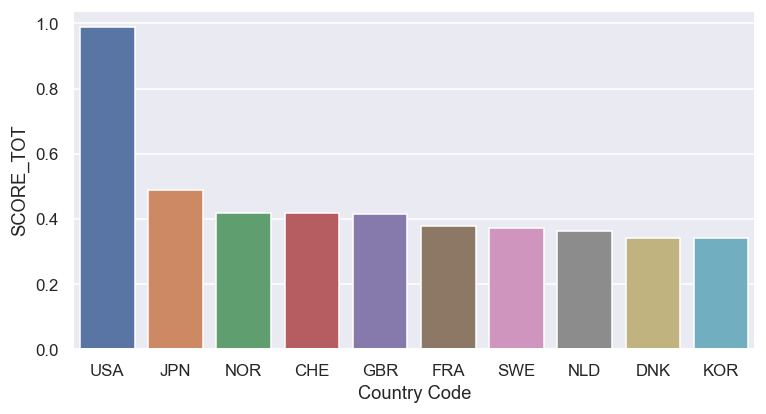

In [177]:
# Présentation des pays selon le score total
plt.figure(figsize=(8,4),dpi=110)
sns.barplot(data=top_ten, x='Country Code', y='SCORE_TOT')
sns.set_palette('dark')
sns.set_theme()

Les Étas-Unis c'est le pays qui enregistre le plus bon score. 

In [178]:
# Utilisation de Seaborn : 

sns.set_context("talk") # for the font size

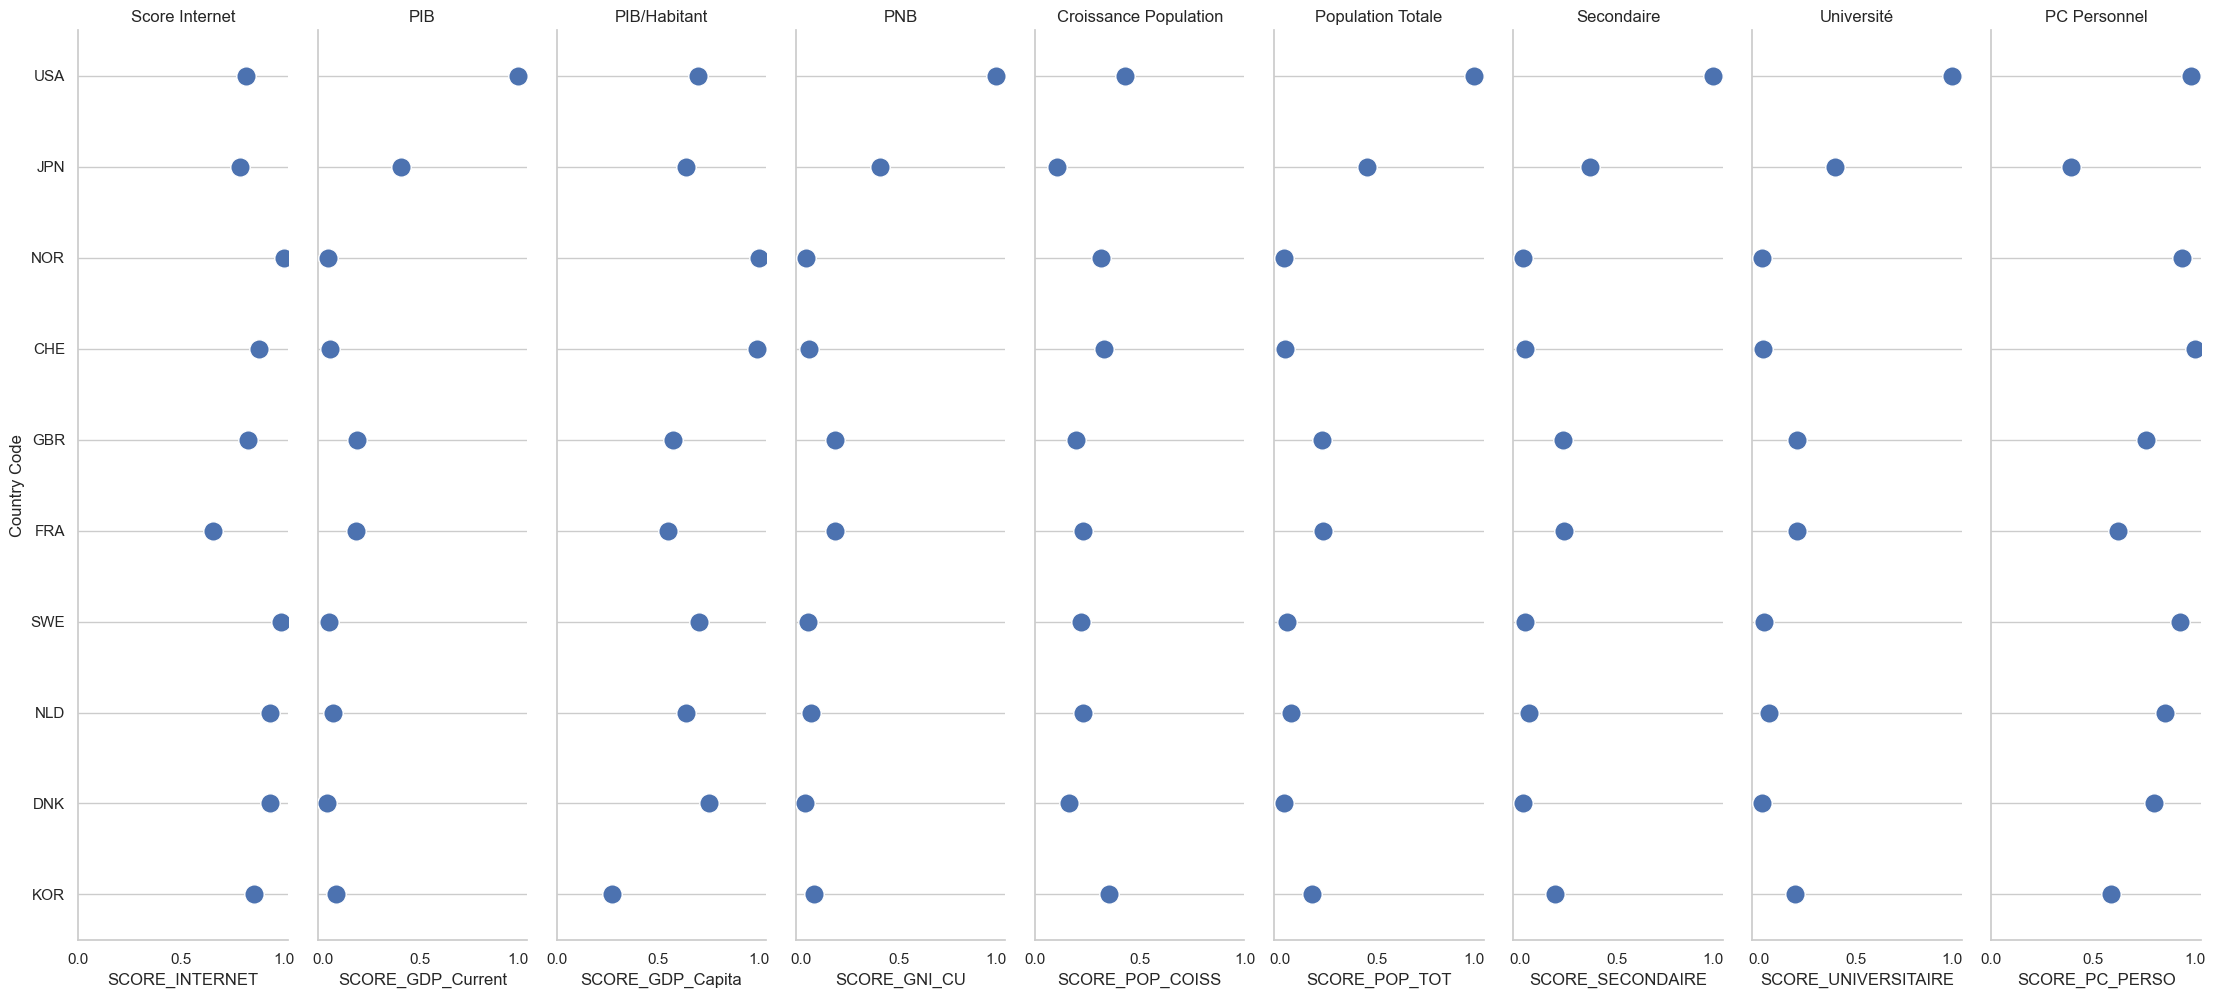

In [180]:
# Représentation graphique : 

sns.set_theme(style="whitegrid")

g = sns.PairGrid(top_ten,
                 x_vars=top_ten.columns[-10:-1], y_vars=["Country Code"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=14, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")



titles = ["Score Internet","PIB","PIB/Habitant" , "PNB" ,"Croissance Population", "Population Totale","Secondaire"
          ,"Université","PC Personnel"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xticks([0,0.5,1])
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=False, bottom=False)


## Conclusion<a name="titre5"></a>

 - Les États-Unis, enregistre les meilleurs scores sur la majorité des indicateurs, hormis la croissance de la population
    et le produit intérieur brut par habitant.
 - En matière de population étudiante en âge d'entrée dans le secondaire, nous remarquons que la plupart des pays n'enregistre pas un bon score, c'est le même constat pour la population en âge d'entrée au Lycée, hormis les deux pays États-Unis et Japon.  
 - Les data frames utilisés sont : EdStatsSeries (pour la sélection des indicateurs pertinents), EdStatsCountry (pour la sélection des pays à haut revenu) et le EdStatsData (pour finaliser les analyses).
 - Le **taux de remplissage** du data frame EdStatsData au départ est de **20,52 %**. 
 - L'année la plus fournie en matière de données est l'an 2010, on retrouve le moins de données manquantes. 
 - Après avoir filtrer le data frame EdStatsData plusieurs fois, nous sommes arrivés à un taux de remplissage de 87,11%. 
 - Les 10 Pays les plus attractifs sont donc : les États-Unis, le Japon, la Norvège , la Suisse, la Grande-Bretagne, la France, la Suède, les Pays-Bas, le Danemark et la Corée. 